In [1]:
pwd

'C:\\Users\\still\\OneDrive\\Diverse\\RUC\\MSc Thesis\\Jupyter'

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import random

In [3]:
################ SERVER ################

In [4]:
dataDir = '/Users/still/Downloads/Exported'

# Areas
koaServerEmployeesAreas = pd.read_csv(dataDir + '/koaServerEmployeesAreas.csv', sep=',', decimal= ',')
koaServerDepartmentsAreas = pd.read_csv(dataDir + '/koaServerDepartmentsAreas.csv', sep=',', decimal= ',')

my_pal = {"Express":"#fa344f"}#, "Nest":"#ff9f0f", "Fastify":"#03a341", "Koa":"#fa344f"}
my_pal2 = ["#fa344f"]#, "#ff9f0f", "#03a341", "#fa344f"]

koaServerEmployeesAreas

,area,run
0,69.19999999999999,1
1,66.64999999999998,2
2,67.04999999999998,3
3,73.05,4
4,66.39999999999999,5
5,65.85,6
6,66.29999999999998,7
7,65.64999999999999,8
8,65.64999999999998,9
9,65.8,10


In [5]:
for i in range (0, 31):
    koaServerEmployeesAreas['area'][i] = round(float(koaServerEmployeesAreas['area'][i]),1)
    koaServerDepartmentsAreas['area'][i] = round(float(koaServerDepartmentsAreas['area'][i]),1)
    
koaServerEmployeesAreas

C:\Users\still\AppData\Local\Temp\ipykernel_40044\1824379990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  koaServerEmployeesAreas['area'][i] = round(float(koaServerEmployeesAreas['area'][i]),1)
C:\Users\still\AppData\Local\Temp\ipykernel_40044\1824379990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  koaServerDepartmentsAreas['area'][i] = round(float(koaServerDepartmentsAreas['area'][i]),1)


,area,run
0,69.2,1
1,66.6,2
2,67.0,3
3,73.0,4
4,66.4,5
5,65.8,6
6,66.3,7
7,65.6,8
8,65.6,9
9,65.8,10


In [6]:
m1c = koaServerEmployeesAreas['area'].mean()
m1s = koaServerDepartmentsAreas['area'].mean()

d = {'experiment': ["Koa"],
     'meanAreaEmp': [m1c],
     'meanAreaDept': [m1s]}
df = pd.DataFrame(data=d)

In [7]:
df2 = df
df2 = pd.melt(df2, id_vars="experiment", var_name="means", value_name="Mean area")
df2

,experiment,means,Mean area
0,Koa,meanAreaEmp,65.122581
1,Koa,meanAreaDept,145.454839


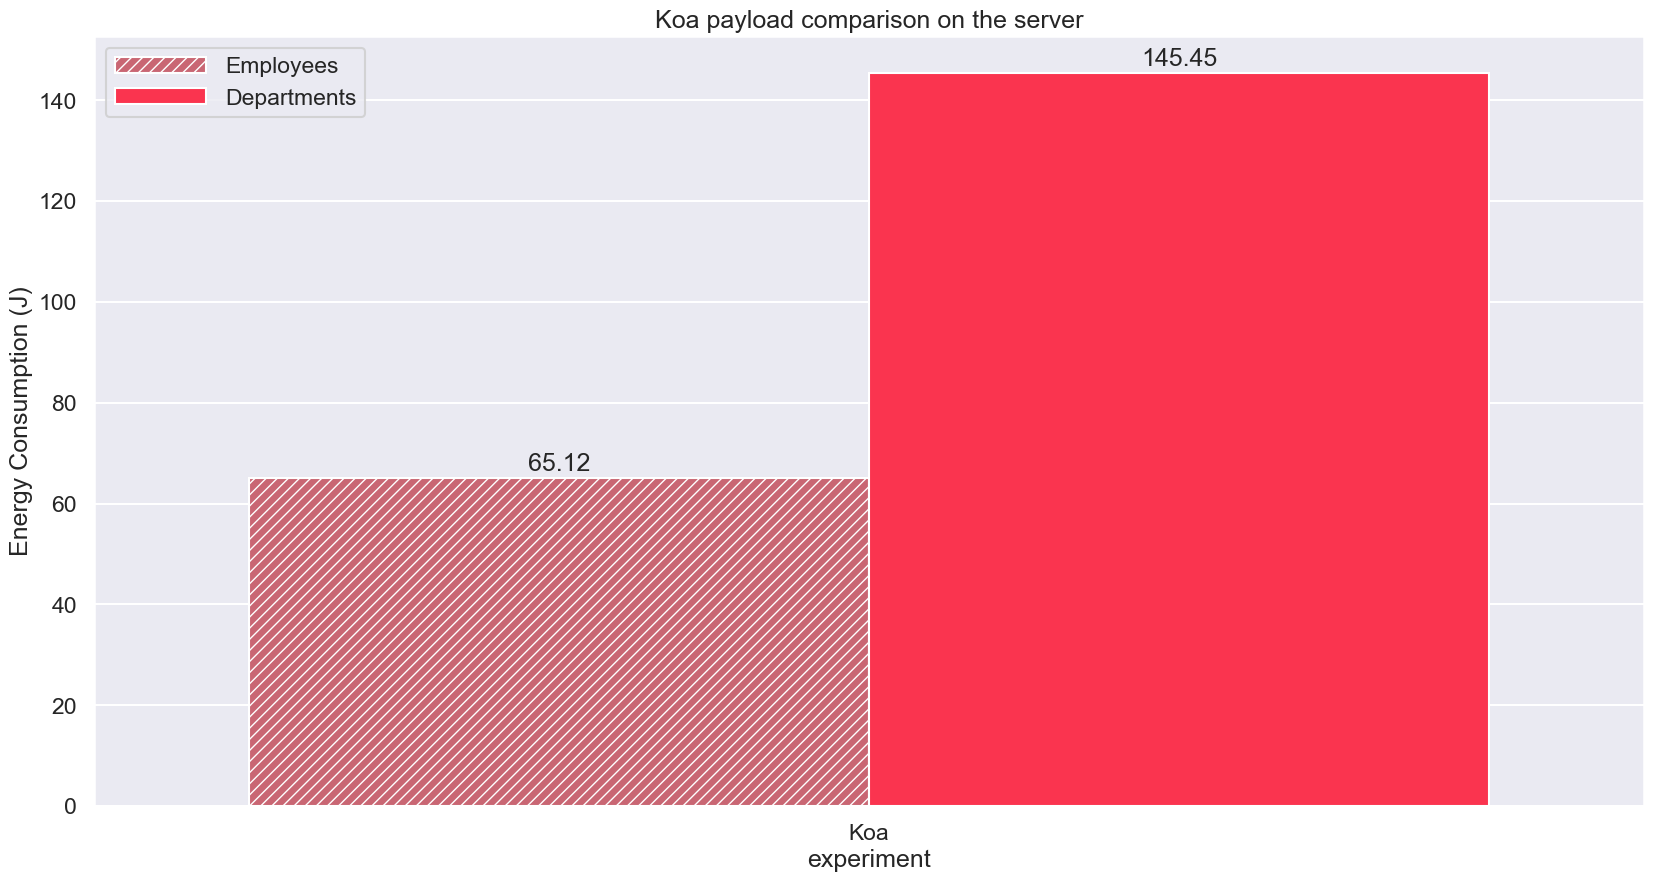

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("talk")
ax = sns.barplot(x="experiment", y="Mean area", hue="means",
            palette={'meanAreaEmp': 'white', 'meanAreaDept': 'black'}, data=df2)
for bar_group, desaturate_value in zip(ax.containers, [0.5, 1]):
    for bar, color in zip(bar_group, my_pal2):
        bar.set_facecolor(sns.desaturate(color, desaturate_value))

hatches = ["///", ""]
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
        
plt.title("Koa payload comparison on the server")
#plt.xlabel("Experiment Type")
plt.ylabel("Energy Consumption (J)")

handles, labels = ax.get_legend_handles_labels()

from matplotlib.legend_handler import HandlerTuple
ax.legend(handles=[tuple(bar_group) for bar_group in ax.containers],
          labels=['Employees', 'Departments'],
          handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)})

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

In [9]:
################ CLIENT ################

In [10]:
# Areas
koaClientEmployeesAreas = pd.read_csv(dataDir + '/koaClientEmployeesAreas.csv', sep=',', decimal= ',')
koaClientDepartmentsAreas = pd.read_csv(dataDir + '/koaClientDepartmentsAreas.csv', sep=',', decimal= ',')

koaClientEmployeesAreas

,area,run
0,67.75,1
1,64.0,2
2,65.15,3
3,70.9,4
4,64.3,5
5,64.6,6
6,64.15,7
7,64.19999999999999,8
8,65.5,9
9,65.4,10


In [11]:
for i in range (0, 31):
    koaClientEmployeesAreas['area'][i] = round(float(koaClientEmployeesAreas['area'][i]),1)
    koaClientDepartmentsAreas['area'][i] = round(float(koaClientDepartmentsAreas['area'][i]),1)
    
koaClientEmployeesAreas

C:\Users\still\AppData\Local\Temp\ipykernel_40044\2134690287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  koaClientEmployeesAreas['area'][i] = round(float(koaClientEmployeesAreas['area'][i]),1)
C:\Users\still\AppData\Local\Temp\ipykernel_40044\2134690287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  koaClientDepartmentsAreas['area'][i] = round(float(koaClientDepartmentsAreas['area'][i]),1)


,area,run
0,67.8,1
1,64.0,2
2,65.2,3
3,70.9,4
4,64.3,5
5,64.6,6
6,64.2,7
7,64.2,8
8,65.5,9
9,65.4,10


In [12]:
m1c = koaClientEmployeesAreas['area'].mean()
m1s = koaClientDepartmentsAreas['area'].mean()

d = {'experiment': ["Koa"],
     'meanAreaEmp': [m1c],
     'meanAreaDept': [m1s]}
df = pd.DataFrame(data=d)

In [13]:
df3 = df
df3 = pd.melt(df3, id_vars="experiment", var_name="means", value_name="Mean area")
df3

,experiment,means,Mean area
0,Koa,meanAreaEmp,64.416129
1,Koa,meanAreaDept,143.193548


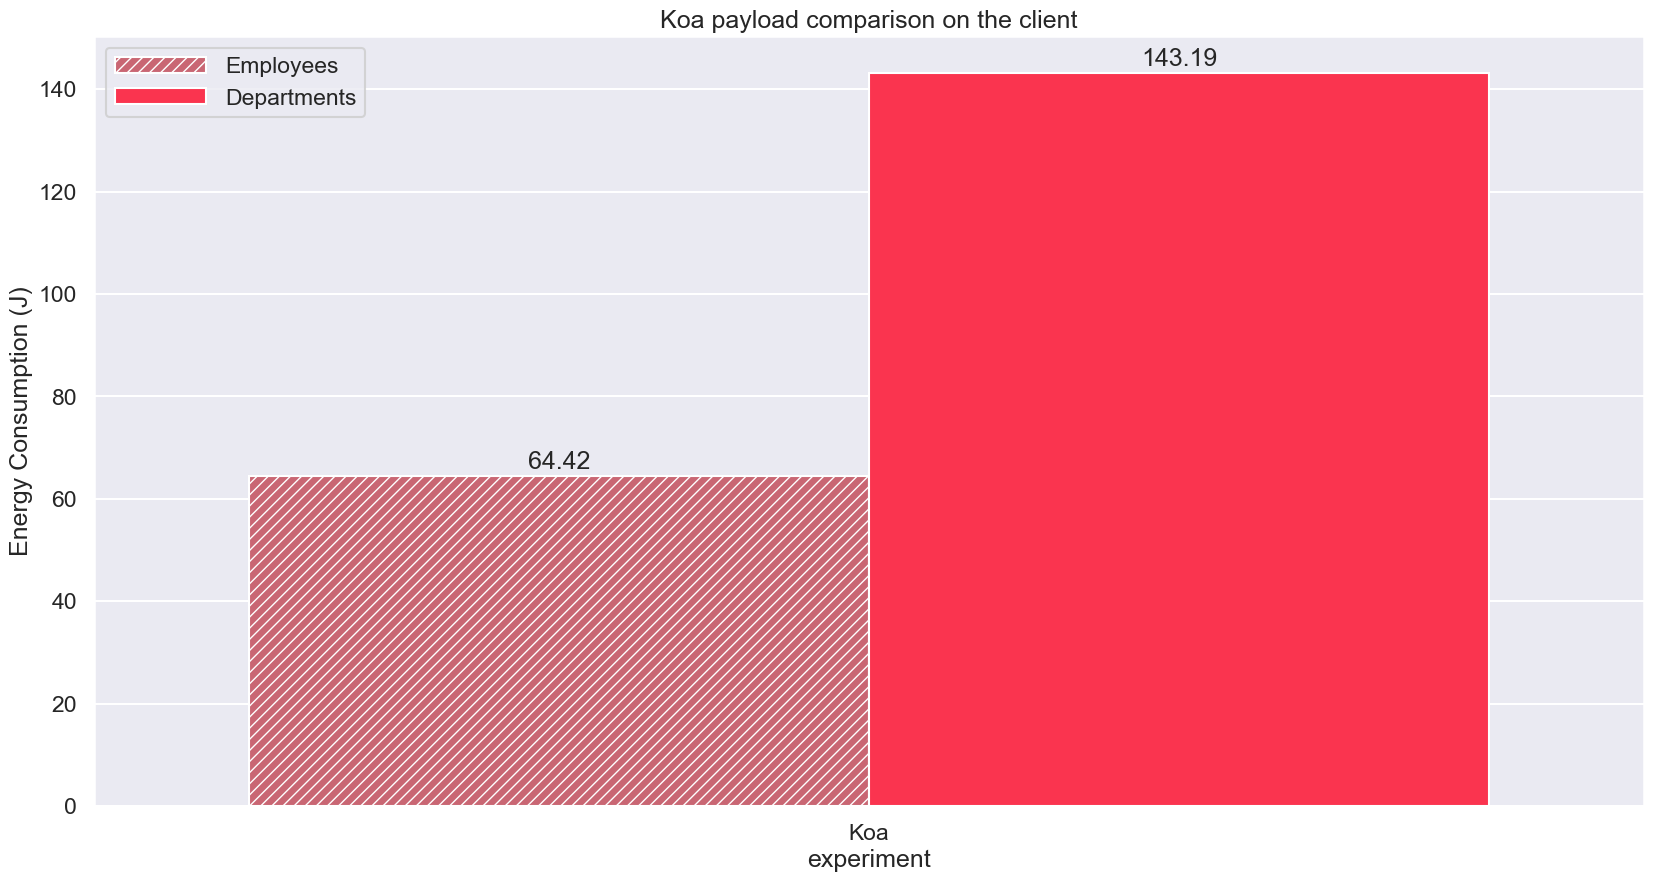

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("talk")
ax = sns.barplot(x="experiment", y="Mean area", hue="means",
            palette={'meanAreaEmp': 'white', 'meanAreaDept': 'black'}, data=df3)
for bar_group, desaturate_value in zip(ax.containers, [0.5, 1]):
    for bar, color in zip(bar_group, my_pal2):
        bar.set_facecolor(sns.desaturate(color, desaturate_value))

hatches = ["///", ""]
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
        
plt.title("Koa payload comparison on the client")
#plt.xlabel("Experiment Type")
plt.ylabel("Energy Consumption (J)")

handles, labels = ax.get_legend_handles_labels()

from matplotlib.legend_handler import HandlerTuple
ax.legend(handles=[tuple(bar_group) for bar_group in ax.containers],
          labels=['Employees', 'Departments'],
            handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)})

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()